In [45]:
# Data obtained from : https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

#KEEP IN MIND: dataset is for fire alarms (indoor), likely, we need to obtain more accutate data for wildfires...

import pandas as pd
smoke = pd.read_csv('smoke_detection_iot.csv')
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [46]:
smoke.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [47]:
print(smoke.isnull().sum())

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


Fire Alarm
1    44757
0    17873
Name: count, dtype: int64


<ipython-input-48-8157b3a045ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = pd.value_counts(smoke['Fire Alarm'])


<Axes: xlabel='Fire Alarm'>

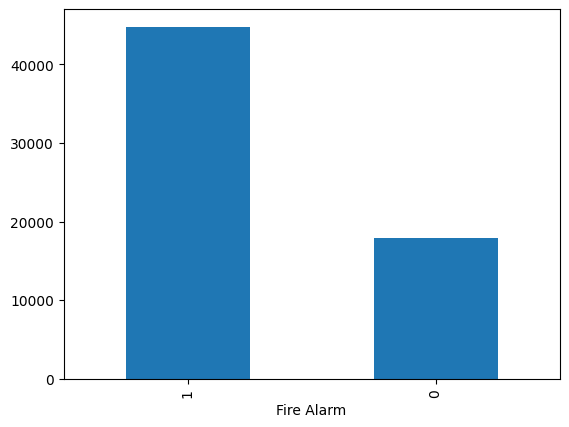

In [48]:
counts = pd.value_counts(smoke['Fire Alarm'])
print(counts)
#plot counts
counts.plot(kind='bar')

In [49]:
import pandas as pd
from sklearn.utils import resample

# Assuming your DataFrame is named 'smokes'
# Separate majority and minority classes
df_majority = smoke[smoke['Fire Alarm'] == True]
df_minority = smoke[smoke['Fire Alarm'] == False]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                     replace=False,     # sample without replacement
                                     n_samples=17500,  # to match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

Fire Alarm
0    17873
1    17500
Name: count, dtype: int64


<ipython-input-50-0987be8d376b>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = pd.value_counts(balanced_df['Fire Alarm'])


<Axes: xlabel='Fire Alarm'>

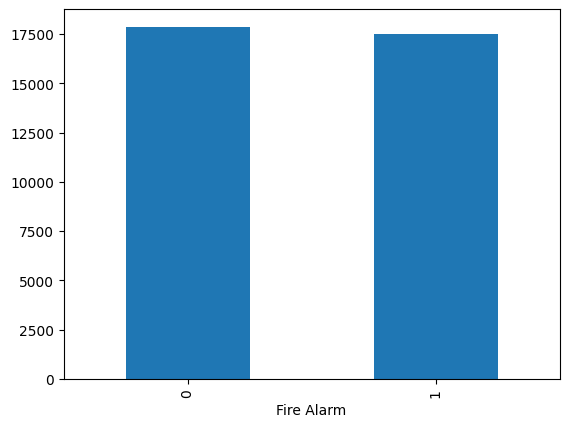

In [50]:
counts = pd.value_counts(balanced_df['Fire Alarm'])
print(counts)
#plot counts
counts.plot(kind='bar')

In [51]:
#looking at z-score
smoke_zscore = (smoke - smoke.mean()) / smoke.std()
smoke_zscore.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,-1.732009,-0.533944,0.280619,0.994939,-0.248612,-0.141677,-2.335917,-2.024990,0.831754,-0.109042,-0.09334,-0.115214,-0.091923,-0.073888,-1.383465,-1.582444
1,-1.731954,-0.533935,0.281664,0.917108,-0.248612,-0.141677,-2.192779,-1.810064,0.838514,-0.109042,-0.09334,-0.115214,-0.091923,-0.073888,-1.383333,-1.582444
2,-1.731899,-0.533926,0.282639,0.837021,-0.248612,-0.141677,-2.086343,-1.624670,0.834008,-0.109042,-0.09334,-0.115214,-0.091923,-0.073888,-1.383201,-1.582444
3,-1.731843,-0.533917,0.283684,0.760318,-0.248612,-0.141677,-2.027619,-1.485215,0.832505,-0.109042,-0.09334,-0.115214,-0.091923,-0.073888,-1.383070,-1.582444
4,-1.731788,-0.533908,0.284728,0.693767,-0.248612,-0.141677,-1.979907,-1.367088,0.838514,-0.109042,-0.09334,-0.115214,-0.091923,-0.073888,-1.382938,-1.582444


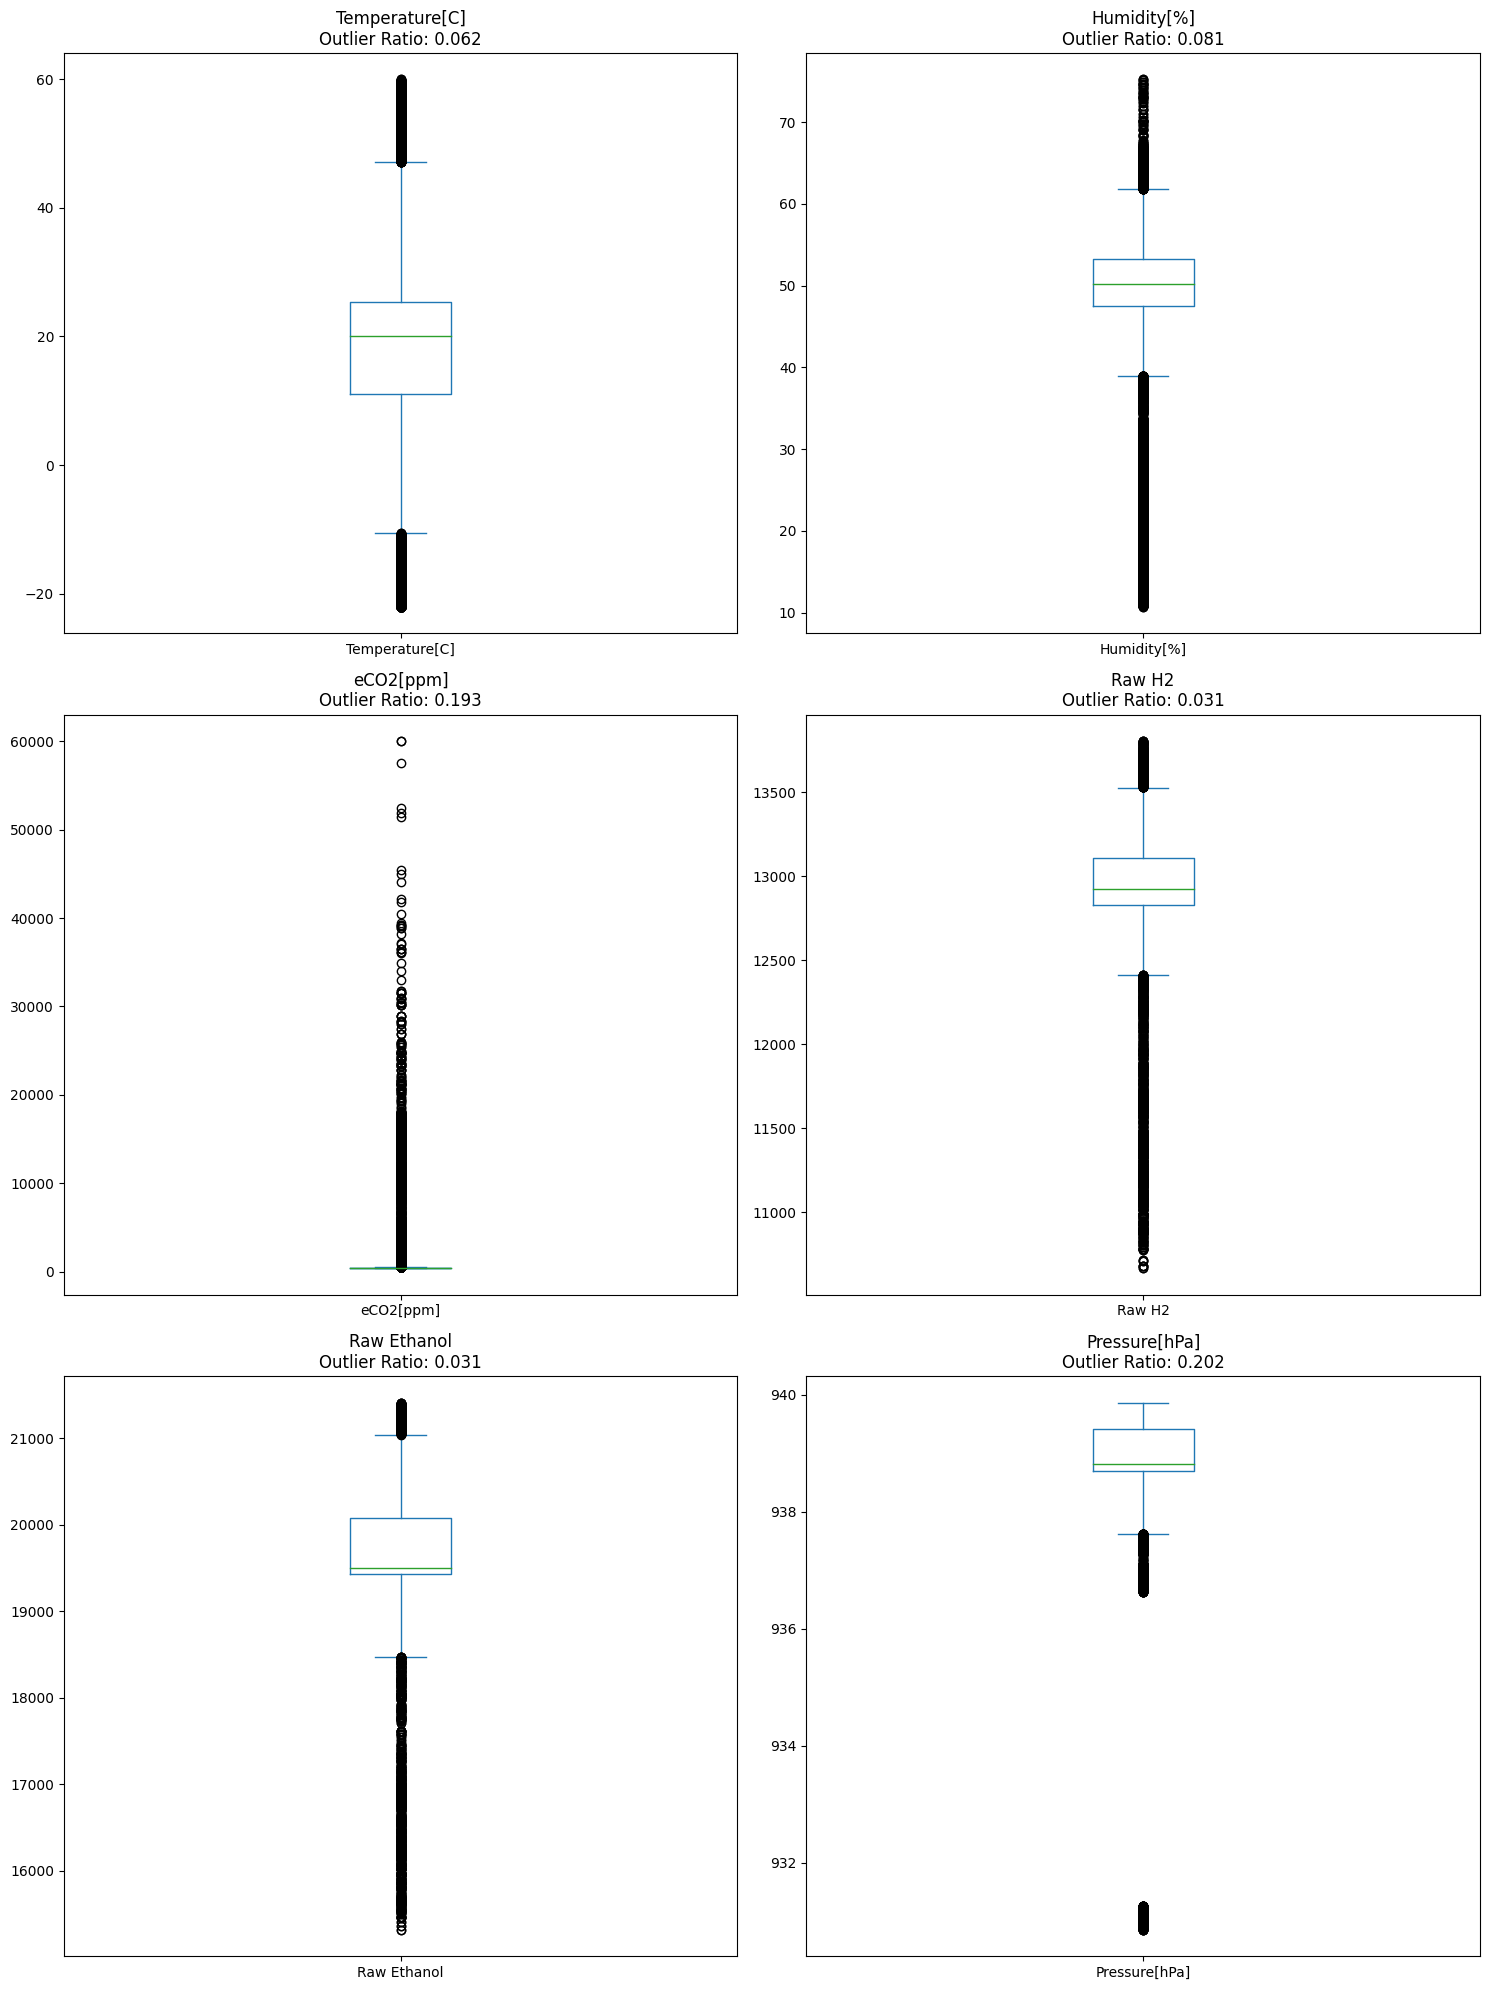

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_box_with_outlier_ratio(data, column, ax=None):
    # Calculate quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_ratio = len(outliers) / len(data[column])

    # Create box plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    data[column].plot(kind='box', ax=ax)
    ax.set_title(f'{column}\nOutlier Ratio: {outlier_ratio:.3f}')

    return ax

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
axs = axs.ravel()

# List of columns to plot
columns = ['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]']

# Create box plots with outlier ratios
for i, column in enumerate(columns):
    plot_box_with_outlier_ratio(smoke, column, ax=axs[i])

plt.tight_layout()
plt.show()

#Outlier ratios are very high!

In [53]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

y = balanced_df['Fire Alarm']
X = balanced_df.drop(columns=['Fire Alarm'])

X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=[
  X.columns.tolist()])
  #'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]','PM1.0', 'PM1.0','PM2.5', 'NC0.5'#NC1.0	NC2.5	CNT	Fire Alarm])

#print("Scaled Dataset Using MinMaxScaler")
X_scaled.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,-1.711400,-0.562206,0.442280,0.691303,-0.266528,-0.159923,-0.791617,-0.174360,0.987383,-0.134678,-0.116234,-0.141306,-0.114468,-0.090794,-1.045031
1,0.727850,-0.195210,0.601327,0.662020,-0.137801,-0.159923,0.183063,-0.616297,0.199655,-0.133437,-0.115651,-0.139487,-0.113934,-0.090845,2.166483
2,-1.472322,-0.528335,-1.747155,0.170063,-0.262842,-0.159923,0.951910,0.417115,0.907853,-0.133056,-0.115457,-0.138939,-0.113754,-0.090836,-0.398503
3,0.577062,-0.216573,0.505885,0.646402,-0.134988,-0.150042,0.055931,-0.626978,0.172388,-0.133102,-0.115483,-0.139014,-0.113779,-0.090837,1.758713
4,-0.744574,-0.425230,0.163385,0.294028,-0.142845,-0.153635,-0.056066,-0.590929,0.179204,-0.133727,-0.115797,-0.139906,-0.114071,-0.090851,1.569521


Top 10 features for first 10 Principal Components:
              PC0                PC1                PC2                PC3  \
0        (PM1.0,)      (Unnamed: 0,)     (Raw Ethanol,)  (Temperature[C],)   
1        (PM2.5,)   (Pressure[hPa],)             (CNT,)             (UTC,)   
2        (NC0.5,)     (Humidity[%],)  (Temperature[C],)             (CNT,)   
3        (NC1.0,)             (UTC,)           (NC2.5,)     (Raw Ethanol,)   
4    (eCO2[ppm],)             (CNT,)       (TVOC[ppb],)           (NC2.5,)   
5        (NC2.5,)     (Raw Ethanol,)           (NC1.0,)          (Raw H2,)   
6    (TVOC[ppb],)  (Temperature[C],)           (PM2.5,)       (TVOC[ppb],)   
7       (Raw H2,)           (NC2.5,)             (UTC,)           (NC1.0,)   
8  (Raw Ethanol,)           (NC1.0,)          (Raw H2,)           (PM2.5,)   
9  (Humidity[%],)           (PM2.5,)     (Humidity[%],)           (PM1.0,)   

                PC4                PC5                PC6               PC7  \
0          

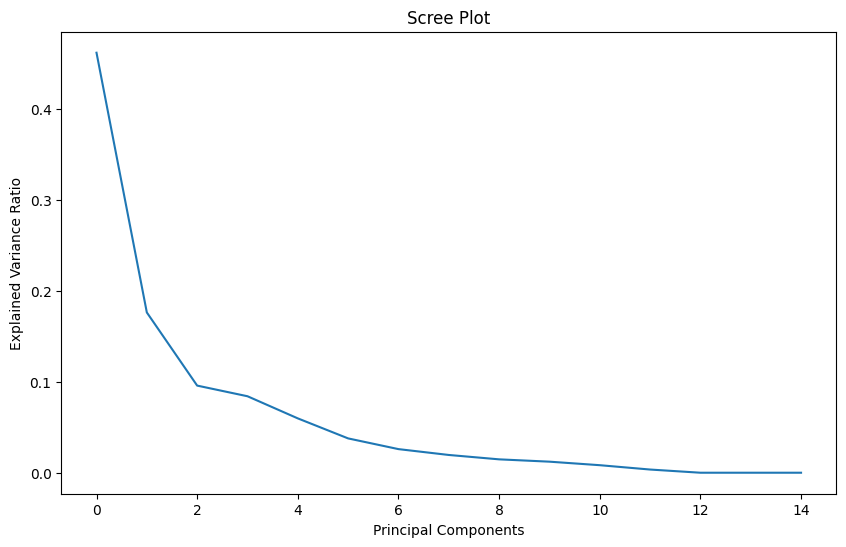

In [54]:
#cell ignored for now ..

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit(X_scaled)

# Create loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC%s' % _ for _ in range(len(X_scaled.columns))],
    index=X_scaled.columns
)

# Function to get top features for each principal component
def get_top_features_pc(loadings, n_features=10):
    top_features = {}
    for pc in loadings.columns:
        # Get absolute loadings and sort
        pc_loadings = pd.Series(
            loadings[pc].abs(),
            index=loadings.index
        )
        top_features[pc] = pc_loadings.nlargest(n_features).index.tolist()
    return pd.DataFrame(top_features)

# Get top 10 features for each PC
top_features_df = get_top_features_pc(loadings, 10)

# Print top features for first 10 PCs
print("Top 10 features for first 10 Principal Components:")
print(top_features_df.iloc[:, :10])

# Plotting explained variance ratio
plot.figure(figsize=(10, 6))
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance Ratio')
plot.xlabel('Principal Components')
plot.title('Scree Plot')
plot.show()

In [55]:
print("Top features for PC0:", top_features_df['PC0'].tolist())

Top features for PC0: [('PM1.0',), ('PM2.5',), ('NC0.5',), ('NC1.0',), ('eCO2[ppm]',), ('NC2.5',), ('TVOC[ppb]',), ('Raw H2',), ('Raw Ethanol',), ('Humidity[%]',)]


In [56]:
X_scaled.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,-1.711400,-0.562206,0.442280,0.691303,-0.266528,-0.159923,-0.791617,-0.174360,0.987383,-0.134678,-0.116234,-0.141306,-0.114468,-0.090794,-1.045031
1,0.727850,-0.195210,0.601327,0.662020,-0.137801,-0.159923,0.183063,-0.616297,0.199655,-0.133437,-0.115651,-0.139487,-0.113934,-0.090845,2.166483
2,-1.472322,-0.528335,-1.747155,0.170063,-0.262842,-0.159923,0.951910,0.417115,0.907853,-0.133056,-0.115457,-0.138939,-0.113754,-0.090836,-0.398503
3,0.577062,-0.216573,0.505885,0.646402,-0.134988,-0.150042,0.055931,-0.626978,0.172388,-0.133102,-0.115483,-0.139014,-0.113779,-0.090837,1.758713
4,-0.744574,-0.425230,0.163385,0.294028,-0.142845,-0.153635,-0.056066,-0.590929,0.179204,-0.133727,-0.115797,-0.139906,-0.114071,-0.090851,1.569521


In [57]:
X_scaled.drop(columns=['Unnamed: 0', 'UTC', 'CNT', 'TVOC[ppb]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'], inplace=True) #remove data i am unsure is collected in sensor

X_scaled.head()

<ipython-input-57-d130628cf4ee>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled.drop(columns=['Unnamed: 0', 'UTC', 'CNT', 'TVOC[ppb]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'], inplace=True) #remove data i am unsure is collected in sensor


,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa]
0,0.442280,0.691303,-0.159923,-0.791617,-0.174360,0.987383
1,0.601327,0.662020,-0.159923,0.183063,-0.616297,0.199655
2,-1.747155,0.170063,-0.159923,0.951910,0.417115,0.907853
3,0.505885,0.646402,-0.150042,0.055931,-0.626978,0.172388
4,0.163385,0.294028,-0.153635,-0.056066,-0.590929,0.179204


In [58]:
print(smoke.duplicated().sum())

0


<ipython-input-59-2a7ad8e1d92c>:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_test.drop(columns=['Pressure[hPa]'], inplace=True) #used because pressure can determine fires on its own with very high accuracy (could be data issue or real life correlation)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3476
           1       1.00      0.91      0.96      3599

    accuracy                           0.96      7075
   macro avg       0.96      0.96      0.96      7075
weighted avg       0.96      0.96      0.96      7075



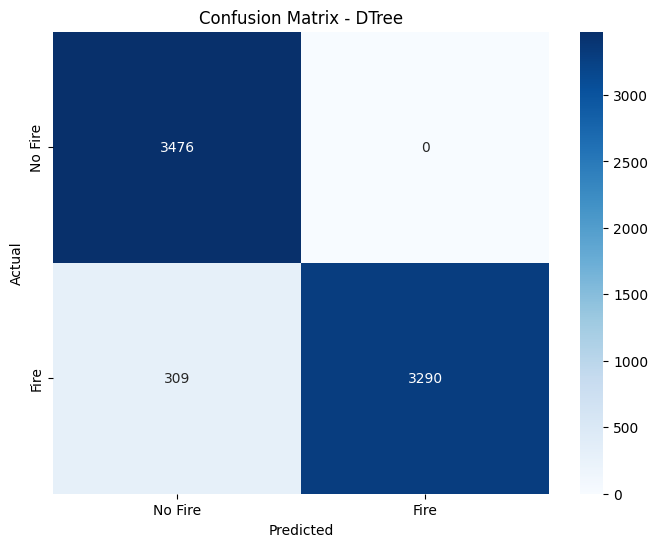

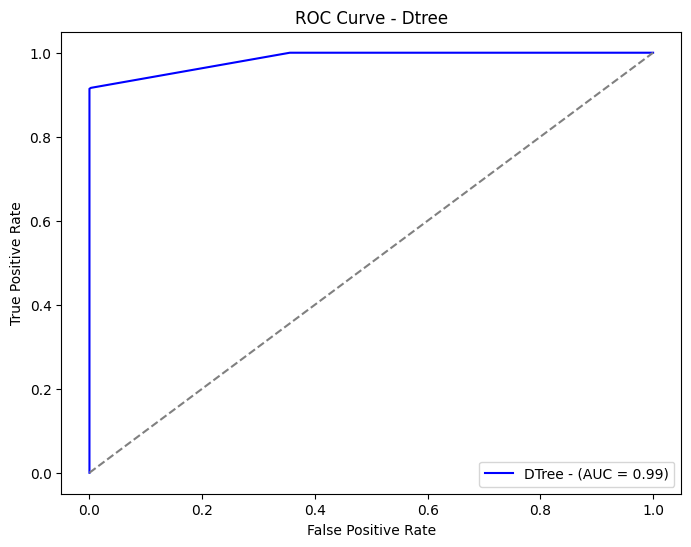

'\naccuracy = metrics.accuracy_score(dtree_y_true, dtree_y_pred)\nprecision = metrics.precision_score(dtree_y_true, dtree_y_pred)#, average=\'weighted\')\nrecall = metrics.recall_score(dtree_y_true, dtree_y_pred)#, average=\'weighted\')\nf1_score = metrics.f1_score(dtree_y_true, dtree_y_pred)#, average=\'weighted\')\n\n\nprint("Accuracy:", accuracy)\nprint("Precision Score:", precision)\nprint("Recall Score: ", recall)\nprint("F1 Score: ", f1_score)\n\nfrom sklearn.metrics import roc_curve, auc\n\ndtree_auc = 0\n\ndef plot_roc(dt_y_true, dt_probs):\n\n\n    dtree_fpr, dtree_tpr, threshold = roc_curve(dt_y_true, dt_probs)\n\n    dtree_auc_val =  auc(dtree_fpr,dtree_tpr)\n\n    print(\'AUC=%0.2f\'%dtree_auc_val)\n\n\n    # Plot the ROC curve using the probabilities and the true y values as passed into the fuction we have defined here\n\n    plt.plot(dtree_fpr, dtree_tpr, label = \'AUC=%0.2f\'%dtree_auc_val, color = \'darkorange\')\n    plt.legend(loc = \'lower right\')\n    plt.plot([0,1

In [59]:
# D TREE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

X_scaled_test= X_scaled.copy()
X_scaled_test.drop(columns=['Pressure[hPa]'], inplace=True) #used because pressure can determine fires on its own with very high accuracy (could be data issue or real life correlation)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Base Model, decision Tree:

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Train and Fit Decision Tree Classifer
clf = clf.fit(X_train, y_train)


#Predict the response for test dataset
dtree_y_pred = clf.predict(X_test)


dtree_y_true = y_test

print(classification_report(y_test, dtree_y_pred))

# Confusion Matrix
cm_original = confusion_matrix(y_test, dtree_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='g', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix - DTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for RF
rf_probs = clf.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class (Fire)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'DTree - (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - Dtree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


'''
accuracy = metrics.accuracy_score(dtree_y_true, dtree_y_pred)
precision = metrics.precision_score(dtree_y_true, dtree_y_pred)#, average='weighted')
recall = metrics.recall_score(dtree_y_true, dtree_y_pred)#, average='weighted')
f1_score = metrics.f1_score(dtree_y_true, dtree_y_pred)#, average='weighted')


print("Accuracy:", accuracy)
print("Precision Score:", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1_score)

from sklearn.metrics import roc_curve, auc

dtree_auc = 0

def plot_roc(dt_y_true, dt_probs):


    dtree_fpr, dtree_tpr, threshold = roc_curve(dt_y_true, dt_probs)

    dtree_auc_val =  auc(dtree_fpr,dtree_tpr)

    print('AUC=%0.2f'%dtree_auc_val)


    # Plot the ROC curve using the probabilities and the true y values as passed into the fuction we have defined here

    plt.plot(dtree_fpr, dtree_tpr, label = 'AUC=%0.2f'%dtree_auc_val, color = 'darkorange')
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'b--')
    plt.xlim([0,1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    return dtree_auc_val


dtree_probs = clf.predict_proba(X_test) [:,1]
dtree_auc = plot_roc(dtree_y_true, dtree_probs)


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

max_acc, max_k = 0, 0

for k in range(2, 11):

  skfold = StratifiedKFold(k, random_state = 100, shuffle = True)

  results_skfold_acc = (cross_val_score(clf, X, y, cv = skfold)).mean() * 100.0

  if results_skfold_acc > max_acc:
    max_acc = results_skfold_acc
    max_k = k

  print("Accuracy: %.2f%%" % (results_skfold_acc))

best_accuracy =  max_acc
best_k_fold =  max_k

print(best_accuracy, best_k_fold)
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3476
           1       1.00      1.00      1.00      3599

    accuracy                           1.00      7075
   macro avg       1.00      1.00      1.00      7075
weighted avg       1.00      1.00      1.00      7075



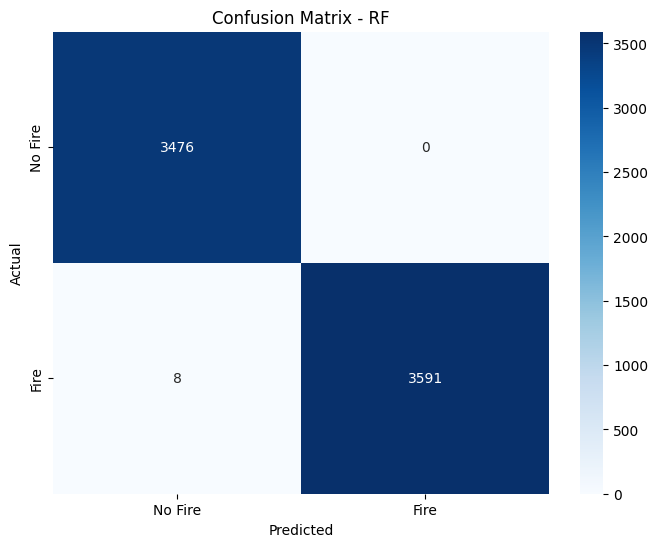

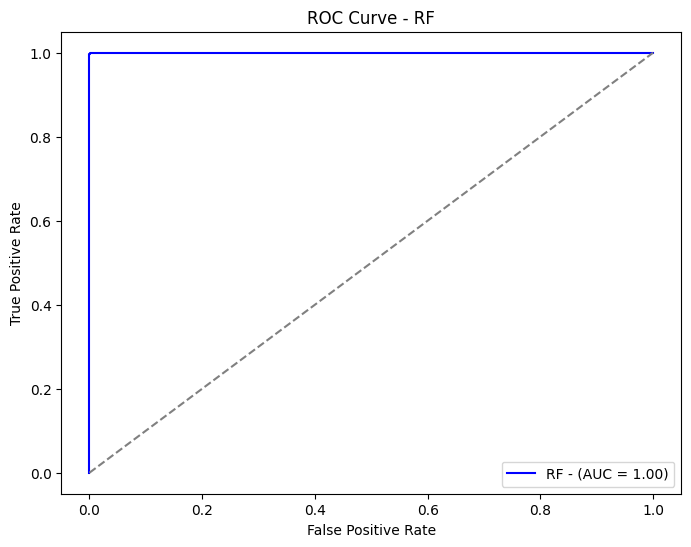

'\nmax_acc, max_k = 0, 0\n\nfor k in range(2, 11):\n\n    skfold = StratifiedKFold(n_splits=k,random_state = 100, shuffle = True)\n\n    results_skfold_acc = (cross_val_score(rf_clf, X, y, cv = skfold)).mean() * 100.0\n\n    if results_skfold_acc > max_acc:\n      max_acc = results_skfold_acc\n      max_k = k\n\n    print("Accuracy: %.2f%%" % (results_skfold_acc))\n\nbest_accuracy =  max_acc\nbest_k_fold =  max_k\n\nprint(best_accuracy, best_k_fold)\n'

In [60]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
                                n_estimators= 500,
                                min_samples_split= 5,
                                min_samples_leaf= 1,
                                max_depth= None,
                                criterion= 'entropy',
                                bootstrap= True,
                                random_state= 42
                              )


rf_clf.fit(X_train,y_train)


rf_y_pred = rf_clf.predict(X_test)

#rf_y_true = y_test

print(classification_report(y_test, rf_y_pred))


# Confusion Matrix
cm_original = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='g', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix - RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for RF
rf_probs = rf_clf.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class (Fire)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'RF - (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



#accuracy = metrics.accuracy_score(rf_y_true,rf_y_pred)
#precision = metrics.precision_score(rf_y_true,rf_y_pred)#, average='weighted')
#recall = metrics.recall_score(rf_y_true,rf_y_pred)#, average='weighted')
#f1_score = metrics.f1_score(rf_y_true,rf_y_pred)#, average='weighted')
#print("Accuracy:", accuracy)
#print("Precision Score:", precision)
#print("Recall Score: ", recall)
#print("F1 Score: ", f1_score)




#rf_probs = rf_clf.predict_proba(X_test) [:,1] # This gives the classifiers' prediction probabilities for each class for the predicted samples
#rf_auc = plot_roc(rf_y_true, rf_probs)


#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score
'''
max_acc, max_k = 0, 0

for k in range(2, 11):

    skfold = StratifiedKFold(n_splits=k,random_state = 100, shuffle = True)

    results_skfold_acc = (cross_val_score(rf_clf, X, y, cv = skfold)).mean() * 100.0

    if results_skfold_acc > max_acc:
      max_acc = results_skfold_acc
      max_k = k

    print("Accuracy: %.2f%%" % (results_skfold_acc))

best_accuracy =  max_acc
best_k_fold =  max_k

print(best_accuracy, best_k_fold)
'''


In [61]:
# XGboost has error with '[', ']' in column names

X_train.columns = [str(col) for col in X_train.columns]
X_test.columns = [str(col) for col in X_test.columns]


X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]


print("New column names:", X_train.columns)

New column names: Index(['('TemperatureC',)', '('Humidity%',)', '('eCO2ppm',)', '('Raw H2',)',
       '('Raw Ethanol',)', '('PressurehPa',)'],
      dtype='object')


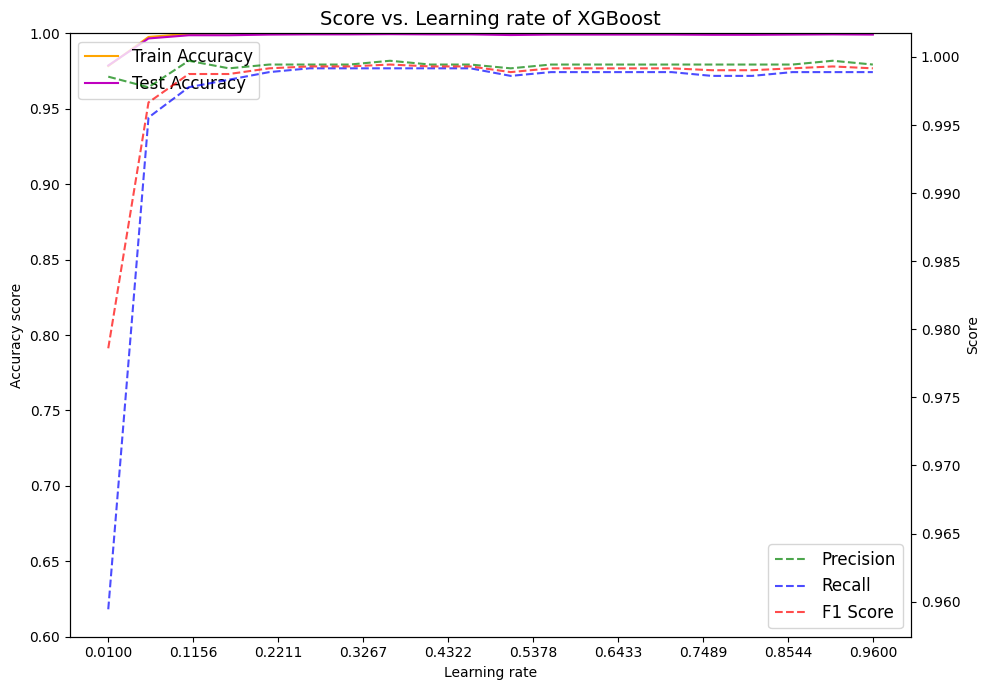

In [62]:
# GB DTREE

import xgboost as xgb

learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta=lr)
    xgb_classifier.fit(X_train, y_train)

    # Calculate train and test accuracy
    train_accuracy = xgb_classifier.score(X_train, y_train)
    test_accuracy = xgb_classifier.score(X_test, y_test)

    # Append accuracy scores
    train_XG.append(train_accuracy)
    test_XG.append(test_accuracy)

    # Make predictions on the test set
    gb_y_pred = xgb_classifier.predict(X_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, gb_y_pred)  #, average='weighted')
    recall = recall_score(y_test, gb_y_pred)  #, average='weighted')
    f1 = f1_score(y_test, gb_y_pred)  #, average='weighted')

    # Append metrics to the respective lists
    accuracies.append(test_accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot accuracy scores
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(learning_rate_range, train_XG, c='orange', label='Train Accuracy')
ax1.plot(learning_rate_range, test_XG, c='m', label='Test Accuracy')
ax1.set_xlabel('Learning rate')
ax1.set_xticks(np.linspace(learning_rate_range[0], learning_rate_range[-1], 10))
ax1.set_ylabel('Accuracy score')
ax1.set_ylim(0.6, 1)
ax1.legend(prop={'size': 12}, loc='upper left')
ax1.set_title('Score vs. Learning rate of XGBoost', size=14)

# Create a second y-axis for other metrics
ax2 = ax1.twinx()
ax2.plot(learning_rate_range, precisions, 'g--', label='Precision', alpha=0.7)
ax2.plot(learning_rate_range, recalls, 'b--', label='Recall', alpha=0.7)
ax2.plot(learning_rate_range, f1_scores, 'r--', label='F1 Score', alpha=0.7)

ax2.set_ylabel('Score')
ax2.legend(prop={'size': 12}, loc='lower right')

plt.tight_layout()
plt.show()

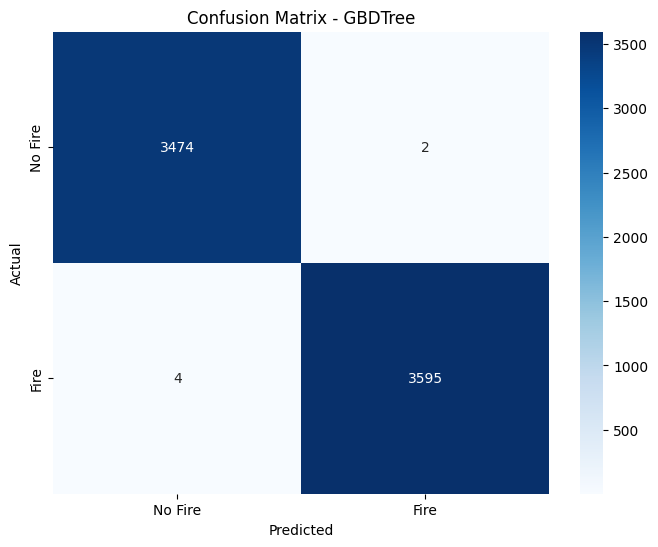

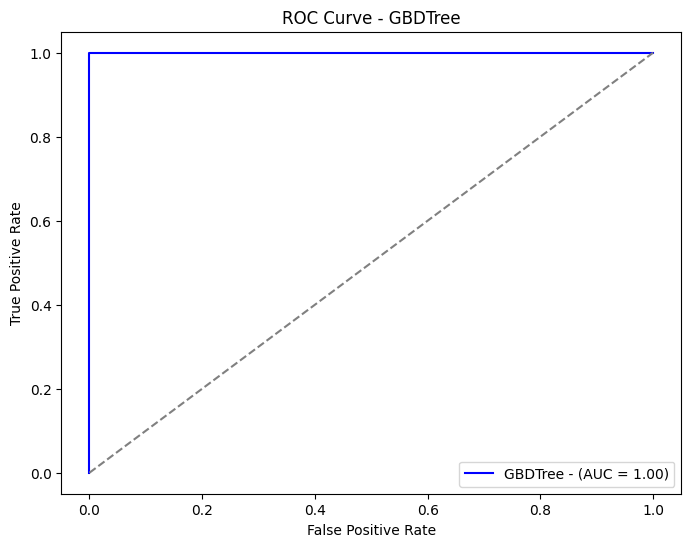

In [63]:
# Confusion Matrix
cm_original = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='g', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix - GBDTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for GBDTree
gb_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class (Fire)
fpr_rf, tpr_rf, _ = roc_curve(y_test, gb_probs)
roc_auc_rf = roc_auc_score(y_test, gb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'GBDTree - (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - GBDTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [64]:
print("\nMetrics for all learning rates:")
print(f"{'Learning Rate':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 55)

for lr, acc, prec, rec, f1 in zip(learning_rate_range, accuracies, precisions, recalls, f1_scores):
    print(f"{lr:<15.3f} {acc:<10.3f} {prec:<10.3f} {rec:<10.3f} {f1:<10.3f}")


best_accuracy_idx = np.argmax(accuracies)
best_precision_idx = np.argmax(precisions)
best_recall_idx = np.argmax(recalls)
best_f1_idx = np.argmax(f1_scores)

print("\nBest metrics:")
print(f"Best Accuracy: {accuracies[best_accuracy_idx]:.3f} (Learning Rate: {learning_rate_range[best_accuracy_idx]:.3f})")
print(f"Best Precision: {precisions[best_precision_idx]:.3f} (Learning Rate: {learning_rate_range[best_precision_idx]:.3f})")
print(f"Best Recall: {recalls[best_recall_idx]:.3f} (Learning Rate: {learning_rate_range[best_recall_idx]:.3f})")
print(f"Best F1 Score: {f1_scores[best_f1_idx]:.3f} (Learning Rate: {learning_rate_range[best_f1_idx]:.3f})")


Metrics for all learning rates:
Learning Rate   Accuracy   Precision  Recall     F1 Score  
-------------------------------------------------------
0.010           0.979      0.999      0.959      0.979     
0.060           0.997      0.998      0.996      0.997     
0.110           0.999      1.000      0.998      0.999     
0.160           0.999      0.999      0.998      0.999     
0.210           0.999      0.999      0.999      0.999     
0.260           0.999      0.999      0.999      0.999     
0.310           0.999      0.999      0.999      0.999     
0.360           0.999      1.000      0.999      0.999     
0.410           0.999      0.999      0.999      0.999     
0.460           0.999      0.999      0.999      0.999     
0.510           0.999      0.999      0.999      0.999     
0.560           0.999      0.999      0.999      0.999     
0.610           0.999      0.999      0.999      0.999     
0.660           0.999      0.999      0.999      0.999     
0.710      

In [65]:
# SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV



# Create a kernel support vector machine model
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)

# Train the model on the training data
ksvm.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = ksvm.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.975547703180212


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3476
           1       0.99      0.95      0.97      3599

    accuracy                           0.97      7075
   macro avg       0.97      0.97      0.97      7075
weighted avg       0.97      0.97      0.97      7075



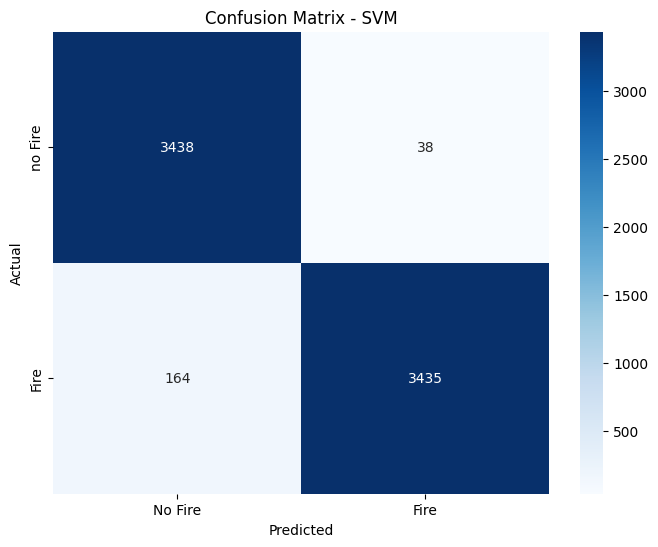

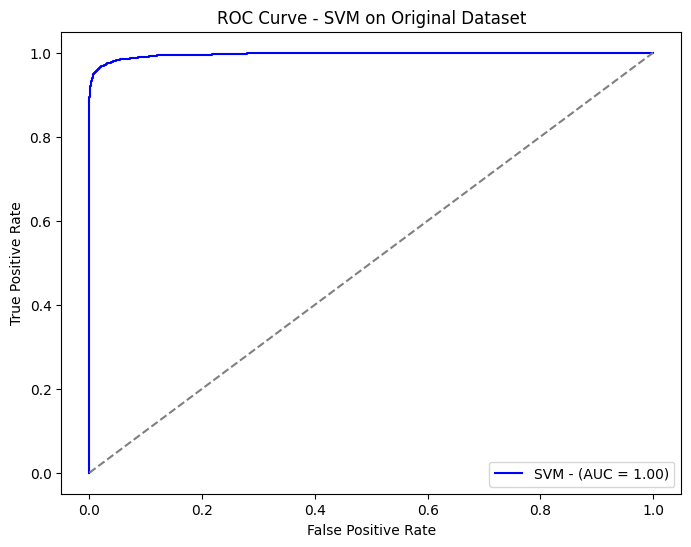

In [66]:
# SVM

svc_model = SVC()
svc_model.fit(X_train, y_train)
svm_y_pred = svc_model.predict(X_test)

print(classification_report(y_test, y_predict))

# Confusion Matrix
cm_original = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='g', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['no Fire', 'Fire'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for SVM
svm_probs = svc_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm_original = roc_auc_score(y_test, svm_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM - (AUC = {roc_auc_svm_original:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - SVM on Original Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

